## Hovmoller Plots for MJO from CAM Daily Output
### - Simple time longitude plots of 2D variables

In [1]:
import xarray as xr
import pandas as pd

import datetime as dt
import numpy as np
import os
import glob as g

 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import cm

import cartopy.crs as ccrs
#from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#import cartopy.feature as cf

import dask as ds
import importlib


from distributed import Client
from ncar_jobqueue import NCARCluster


# My utils
import tropical_var_utils as trop_var
importlib.reload(trop_var)
#%reload_ext autoreload
#%autoreload 3

<module 'tropical_var_utils' from '/glade/work/rneale/git/python-scripts/variability/tropical_var_utils.py'>

In [2]:
cluster = NCARCluster()
cluster.scale(10)
client = Client(cluster)
client

/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/dask_jobqueue/core.py:274: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWa

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/casper1/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/casper1/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.12.206.46:43836,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/casper1/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [33]:
#run_names = ['NOAA'] ; mvar_name = 'FLUT' ; set_name = ['NOAA'] ; dir_in = '/glade/scratch/rneale/archive/' 
#run_names = ['HadISST'] ; mvar_name = 'TS' ; set_name = ['HadISST'] ; dir_in = '/glade/scratch/rneale/archive/' 

#set_name = ['CESM2','NCAR']
#dir_in = '/glade/work/rneale/MSMIP/sst/cesm2/'


set_name = ['E3SMv2','DOE']
dir_in = '/glade/work/rneale/MSMIP/sst/e3smv2/'

mvar_name = 'TS'
run_names = ['CGCM','AGCM_mon','CGCM_bg','AGCM_5dRandPatt','AGCM_1dRandPatt','AGCM_1dRandPt']

year_range = [2002, 2008]
pyear_range  = [2007, 2007]
lat_range = [-5,5]
lon_range  = [40,210]

ps_sub = 'MCONT_bpass'



++++++++++++ -> 
- Model =  E3SMv2 Case 1  ->  CGCM
++++++++++++ -> 

-- trop_data_daily --
-- trop_data_getvar --
<xarray.DataArray 'TS_CGCM' (time: 2557, lat: 10, lon: 137)>
[3503090 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -4.241 -3.298 -2.356 -1.414 ... 2.356 3.298 4.241
  * lon      (lon) float64 40.0 41.25 42.5 43.75 ... 206.2 207.5 208.8 210.0
  * time     (time) datetime64[ns] 2002-01-01 2002-01-02 ... 2008-12-31
    Z        float32 ...
Attributes:
    units:          K
    long_name:      Original Surface temperature (radiative)
    standard_name:  surface_temperature
    cell_methods:   time: mean
    cell_measures:  area: area
-- trop_data_filt --
365 days, 0:00:00


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('O')

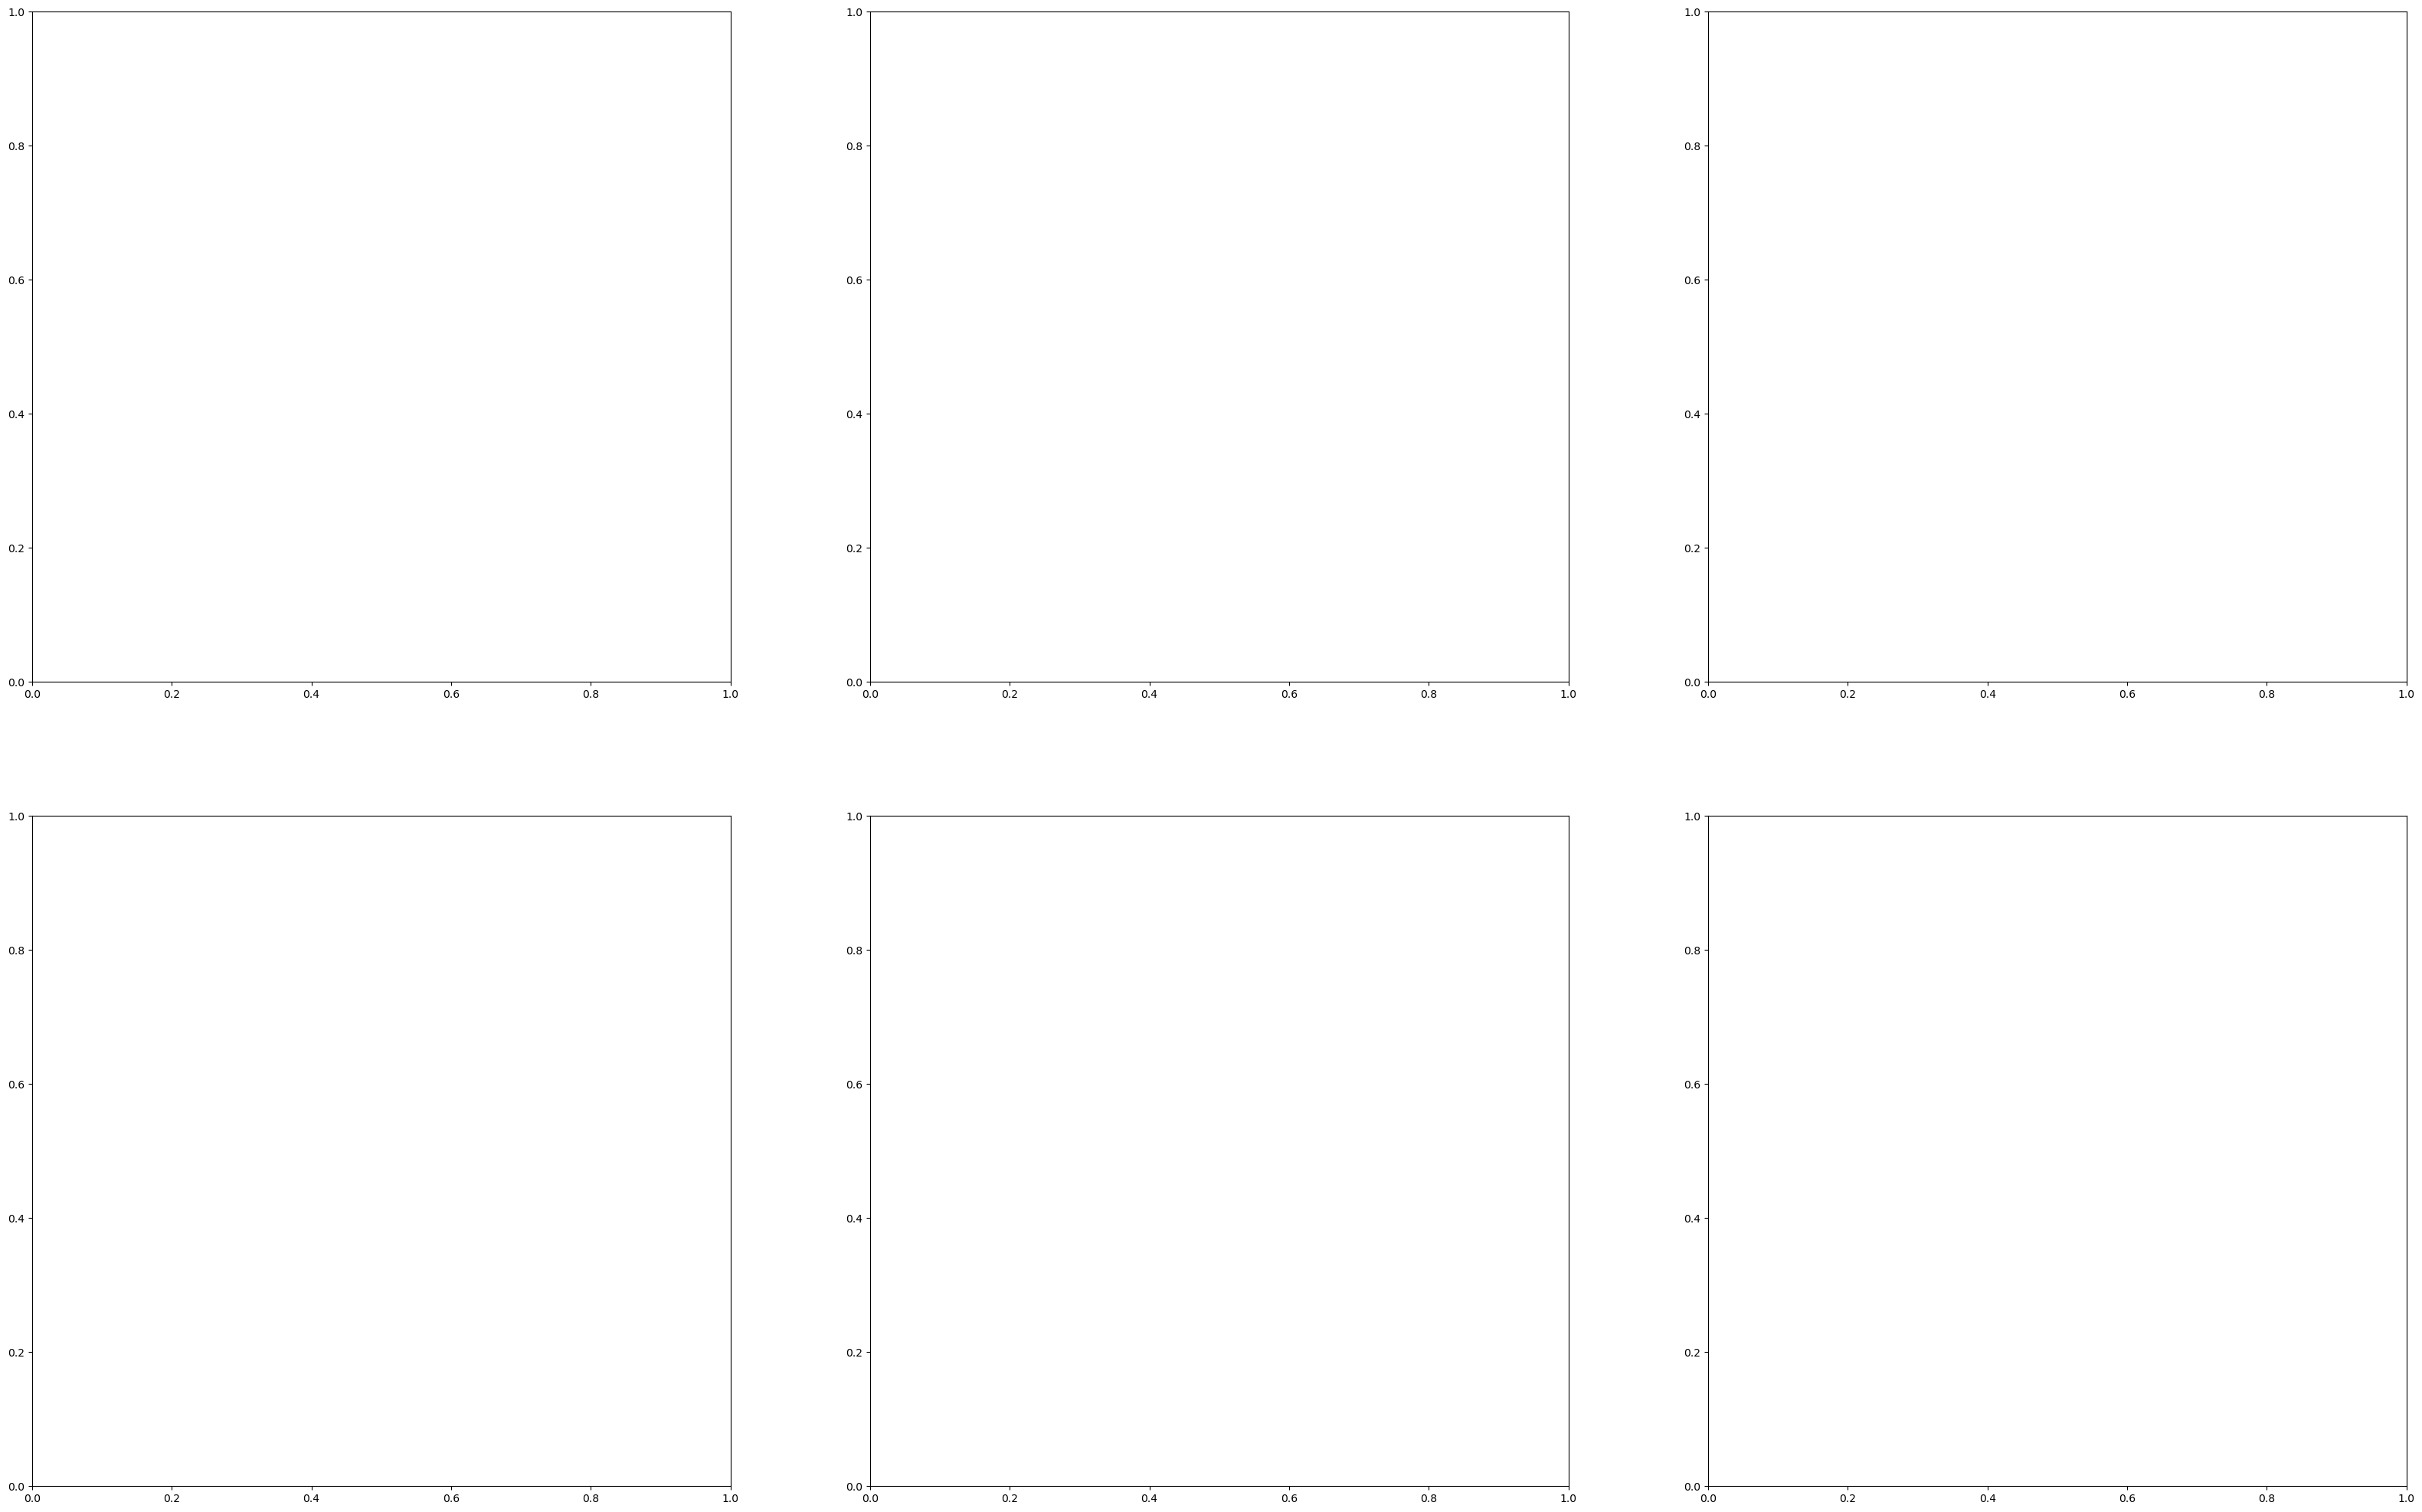

In [34]:
# My utils
#import tropical_var_utils as trop_var
### Template here ##
importlib.reload(trop_var)

fig_hov, ax_hov = plt.subplots(2,3,figsize=(40, 25)) 

for irr, ax in enumerate(ax_hov.ravel()):
    
    run_name = run_names[irr]
    
    print('')
    print('++++++++++++ -> ')
    print('- Model = ',set_name[0],'Case',irr+1,' -> ',run_name)
    print('++++++++++++ -> ')
    print('')

#
# Read in data
# Could use a class here and just read in lat/lon time range, once.??
#
    var_name = trop_var.mvar2ovar(mvar_name,run_name)

    run_ds = trop_var.trop_data_daily(dir_in, run_name,set_name)   
   
    data_var = trop_var.trop_data_getvar(run_ds, var_name, year_range,lat_range,lon_range)  
    print(data_var)
    data_band = trop_var.trop_data_filt(data_var, 'band1')

    ax,pplot = trop_var.trop_data_plot(ax,run_name,data_var,pyear_range)


# Final panel info.
fig_hov.subplots_adjust(bottom=0.23)
cbar_ax = fig_hov.add_axes([0.17, 0.17, 0.65, 0.04])

fig_hov.colorbar(pplot, cax=cbar_ax, orientation="horizontal")

cbar_ax.tick_params(labelsize=25)
fig_hov.suptitle(set_name[0], fontsize=50)

plt.savefig(ps_sub+'_'+set_name[0]+'.png', dpi=120, bbox_inches='tight')

In [ ]:
data_var.sel(time="1982-06-01").plot()

In [ ]:
# da_run['PRECT'].isel(lat=96).sel(time=slice("1986-01-01","1990-12-31")).plot(size=15)